Let's take a look at how the world population is predicted to change throughout this century. 

Let's set up our Python coding environment.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

### Inspecting the Dataset


First, let's import and view the data we are going to be using to look at estimated population growth. It comes from a 2016 UN survey so any data from 2016 or before will be a factual survey, not an estimate.

In [3]:
world_pop = pd.read_csv('C:\Code\Data\pop1.csv')

world_pop

,Country or Area,Year(s),Variant,Value
0,Afghanistan,2100,Medium,70409.629
1,Afghanistan,2100,High,105167.028
2,Afghanistan,2100,Low,44841.532
3,Afghanistan,2099,Medium,70604.652
4,Afghanistan,2099,High,104678.263
5,Afghanistan,2099,Low,45387.714
6,Afghanistan,2098,Medium,70793.669
7,Afghanistan,2098,High,104184.165
8,Afghanistan,2098,Low,45933.673
9,Afghanistan,2097,Medium,70975.797


It seems there really are only 4 columns, but there are 82,719 colums! Even acccounting for 100 year rows per country, thats way too many rows for this data. That would imply over over 820 countries in the UN, there aren't even that many on earth. Let's look through the 4 columns to explain this.

The first column __Country or Area__ contains a list of all the UN countries identifying the country the row's data describes. The secound column __Year(s)__ contains a list of years ranging from 2000 to 2100.  So we actually have 101 years represented rather than just 100. The third column __Variant__ contains the strings 'Medium', 'High', or 'Low' identifying the type of population prediction.  This data contains prediction for average or medium population growth, high population growth, and low population growth. The fourth column __Value__ contains a number containing the population prediction, in thousands of people.


## Visualizing our Data


While we certainly understand the data much more now, it is still not very disgestable in this tabular format. Let's create some graphical visualiations to assist us.  To start, why don't we look at how the population of the world's 6 most populous countries, China, India, The United States, Indonesia, Brazil, and Pakistan will change.  Let's begin by just graphing the medium estimated population growth

In [4]:
china_pop = world_pop[world_pop['Country or Area']=='China']
india_pop = world_pop[world_pop['Country or Area']=='India']
us_pop = world_pop[world_pop['Country or Area']=='United States of America']
indonesia_pop = world_pop[world_pop['Country or Area']=='Indonesia']
brazil_pop = world_pop[world_pop['Country or Area']=='Brazil']
paki_pop = world_pop[world_pop['Country or Area']=='Pakistan']
#initialize data frames for the 6 most populous countries
#having these will come in handy later

china_pop_med = china_pop[china_pop['Variant']=='Medium']
india_pop_med = india_pop[india_pop['Variant']=='Medium']
us_pop_med = us_pop[us_pop['Variant']=='Medium']
indonesia_pop_med = indonesia_pop[indonesia_pop['Variant']=='Medium']
brazil_pop_med = brazil_pop[brazil_pop['Variant']=='Medium']
paki_pop_med = paki_pop[paki_pop['Variant']=='Medium']
#initialize data frames for 6 most populous countires medium predictions

We've created 2 sets of data frames.  The first six contain all the population estimates for the current 6 most populous countries repectively while the second six contain the same data but only with the medium population estimates.  For now, we'll just use the medium estimate data frames, the first set will be useful later one.

Let's set up a line grapg with all 6 countries' population estimates on it. 

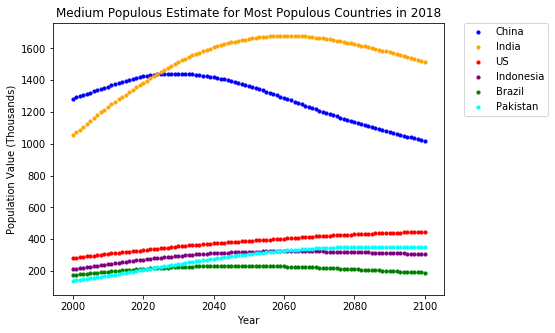

In [5]:
plt.figure(figsize=(7,5))
plt.scatter(x=china_pop_med['Year(s)'], y=china_pop_med['Value']/1000, s=10, color='blue', label='China')
plt.scatter(x=india_pop_med['Year(s)'], y=india_pop_med['Value']/1000, s=10, color='orange', label='India')
plt.scatter(x=us_pop_med['Year(s)'], y=us_pop_med['Value']/1000, s=10, color='red', label='US')
plt.scatter(x=indonesia_pop_med['Year(s)'], y=indonesia_pop_med['Value']/1000, s=10, color='purple', label='Indonesia')
plt.scatter(x=brazil_pop_med['Year(s)'], y=brazil_pop_med['Value']/1000, s=10, color='green', label='Brazil')
plt.scatter(x=paki_pop_med['Year(s)'], y=paki_pop_med['Value']/1000, s=10, color='cyan', label='Pakistan')
#we divide the population value by 1000 to put the pop value in thousands and get a cleaner graph


plt.title('Medium Populous Estimate for Most Populous Countries in 2018')
plt.xlabel('Year')
plt.ylabel('Population Value (Thousands)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

Now we can get a much better idea of what our data really looks like.  We can see from the visualization that this really is quite a thorough prediction. There isn't just a different rate of population increase with every respective prediction, each prediction has varying periods of increase and decrease. Just what we would hope for from UN data.  

While this graph has told us a lot more about our data, it is difficult to discern the changes in each population, since there values are so different.  China's and India's starting values absolutely dwarf the other 4 and all 6 curves suffer for it. Since there seem to be 2 very different groups of population sizes amoung our six countries, let's group them on 2 different graphs. 

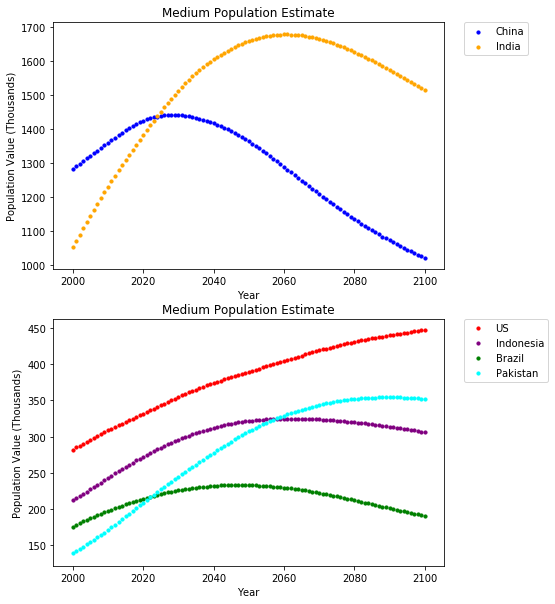

In [6]:
plt.figure(figsize=(7,10))

plt.subplot(2,1,1)
plt.scatter(x=china_pop_med['Year(s)'], y=china_pop_med['Value']/1000, s=10, color='blue', label='China')
plt.scatter(x=india_pop_med['Year(s)'], y=india_pop_med['Value']/1000, s=10, color='orange', label='India')
plt.title('Medium Population Estimate')
plt.xlabel('Year')
plt.ylabel('Population Value (Thousands)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplot(2,1,2)
plt.scatter(x=us_pop_med['Year(s)'], y=us_pop_med['Value']/1000, s=10, color='red', label='US')
plt.scatter(x=indonesia_pop_med['Year(s)'], y=indonesia_pop_med['Value']/1000, s=10, color='purple', label='Indonesia')
plt.scatter(x=brazil_pop_med['Year(s)'], y=brazil_pop_med['Value']/1000, s=10, color='green', label='Brazil')
plt.scatter(x=paki_pop_med['Year(s)'], y=paki_pop_med['Value']/1000, s=10, color='cyan', label='Pakistan')
plt.title('Medium Population Estimate')
plt.xlabel('Year')
plt.ylabel('Population Value (Thousands)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


These 2 graphs are much more useful than our original 2 as we can get much more detail about how the population estimates interact with one another. Still, each country's individual change is still a little mute and hard to discren. Let's put each of the country's predictions in a seperate graph so we can better visualize each country's change.

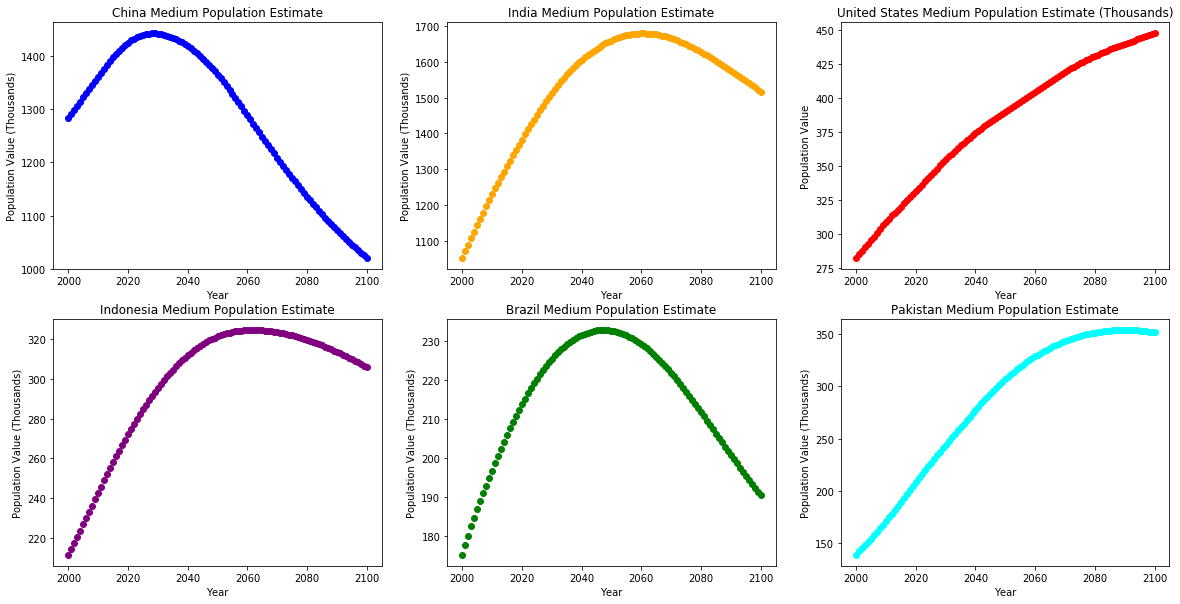

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.scatter(x=china_pop_med['Year(s)'], y=china_pop_med['Value']/1000, color='blue')
plt.title('China Medium Population Estimate')
plt.xlabel('Year')
plt.ylabel('Population Value (Thousands)')
#plt.ylim([150, 1800])

plt.subplot(2,3,2)
plt.scatter(x=india_pop_med['Year(s)'], y=india_pop_med['Value']/1000, color='orange')
plt.title('India Medium Population Estimate')
plt.xlabel('Year')
plt.ylabel('Population Value (Thousands)')
#plt.ylim([150, 1800])

plt.subplot(2,3,3)
plt.scatter(x=us_pop_med['Year(s)'], y=us_pop_med['Value']/1000, color='red')
plt.title('United States Medium Population Estimate (Thousands)')
plt.xlabel('Year')
plt.ylabel('Population Value')
#plt.ylim([150, 1800])

plt.subplot(2,3,4)
plt.scatter(x=indonesia_pop_med['Year(s)'], y=indonesia_pop_med['Value']/1000, color='purple')
plt.title('Indonesia Medium Population Estimate')
plt.xlabel('Year')
plt.ylabel('Population Value (Thousands)')
#plt.ylim([150, 1800])

plt.subplot(2,3,5)
plt.scatter(x=brazil_pop_med['Year(s)'], y=brazil_pop_med['Value']/1000, color='green')
plt.title('Brazil Medium Population Estimate')
plt.xlabel('Year')
plt.ylabel('Population Value (Thousands)')
#plt.ylim([150, 1800])

plt.subplot(2,3,6)
plt.scatter(x=paki_pop_med['Year(s)'], y=paki_pop_med['Value']/1000, color='cyan')
plt.title('Pakistan Medium Population Estimate')
plt.xlabel('Year')
plt.ylabel('Population Value (Thousands)')
#plt.ylim([150, 1800])

plt.show()

## Interpreting Trends


Now that we can see each curved zoomed in on its range, we can better interpret the trends that each country's population is expected to take. We can also refer to our previous set of graphs to remind us of how these population estimate curves interact.

China's population will continue to balloon until sometime around 2030 when the population will hit its peak, after which the population will fall into an ever increasing decline.  By 2040 the decline will be almost as steep as it's previous growth and by sometime 2060 China's popualtion will be lower than it is today.

India's population looks to increase even faster than China's initial rate and looks to overtake China as the most populous country on Earth sometime after 2020. By 2040, the rate of increase will have slowed significantly, totally stopping and hitting a popualtion peak around 2060, almost double its 2000 population. After that, India's popualtion will enter a period of slow, steady decrease. At the end of the century, India's population is still expected to be higher than China's peak expected population of 2030.

The United States is the only country expected to maintain an increase in population across the entire century.  Throughout the century, the rate steadily has a miminal decrease in the rate of increase. Never the less, the rate still appears to be increase until the end of the century.

Indonesia is expected to experiance steady increase until about 2040, when the rate of increase will begin to slow dramatically. After 2050, the rate of increase will complete hault and the population will hit its peak. After, the population will experiance minimal, steady decrease until the end of the century.

Brazil's population prediction is almost perfectly parabolic, experiancing steady increase around 2050 where the popultion peaks.  After, it will enter a period of population decline of a similar rate as there previous population increase. By the end of the century, Brazil's population will only slightly higher than it's population at the begining of the century and less than it's 2018 population.

Pakistan has the biggest increase of any country percentage-wise, growing by around 150% from the begining to the end of the century. From 2000 to 2050, Pakistan's population will increase sharply, surpassing Brazil's around 2020.  Though the rate of increase slows after 2050, Pakistan's popualtion will continue to grow, surpassing Indonesia's population around 2060 and peaking around 2090. After, Pakistan's population will decrease only slightly, almost remaining the same. 


## Taking a Closer Look at the Most Populuous Countries


As we stated in our analysis of the first visualization of our data, there were 2 distinct groups in our top 6 most populous countries: China and India versus the rest.  China's and India's populations simply dwarf other country's population.

Let's take a closer look at the different predictions of both China and India.

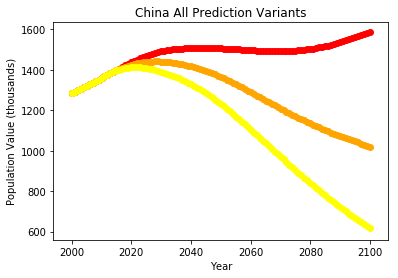

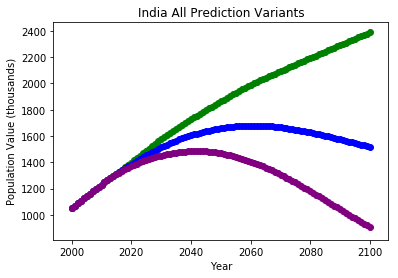

In [12]:
china_pop_high = china_pop[china_pop['Variant']=='High']
india_pop_high = india_pop[india_pop['Variant']=='High']
china_pop_low = china_pop[china_pop['Variant']=='Low']
india_pop_low = india_pop[india_pop['Variant']=='Low']

plt.scatter(x=china_pop_high['Year(s)'], y=china_pop_high['Value']/1000,color='red') 
plt.scatter(x=china_pop_med['Year(s)'], y=china_pop_med['Value']/1000,color='orange') 
plt.scatter(x=china_pop_low['Year(s)'], y=china_pop_low['Value']/1000,color='yellow') 
plt.title('China All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.show()

plt.scatter(x=india_pop_high['Year(s)'], y=india_pop_high['Value']/1000,color='green') 
plt.scatter(x=india_pop_med['Year(s)'], y=india_pop_med['Value']/1000,color='blue') 
plt.scatter(x=india_pop_low['Year(s)'], y=india_pop_low['Value']/1000,color='purple') 
plt.title('India All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.show()